In [1]:
import pandas as pd
import numpy
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
features = data.filter(regex=r"_mean", axis=1)

In [5]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
y = data['diagnosis'].map({"M": 0, "B": 1})

In [7]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=0.5)

In [10]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((284, 10), (285, 10), (284,), (285,))

In [11]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
mdl.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
from sklearn.metrics import classification_report
p = mdl.predict(Xval)
print(classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       104
           1       0.92      0.98      0.95       181

    accuracy                           0.93       285
   macro avg       0.94      0.91      0.93       285
weighted avg       0.94      0.93      0.93       285



In [13]:
import shap

# load JS visualization code to notebook
shap.initjs()

/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [21]:
p[:5]

array([1, 0, 1, 1, 1])

In [14]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)

In [15]:
explainer

In [29]:
shap_values[1].shape

(284, 10)

In [28]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:])

In [30]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:])

In [31]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

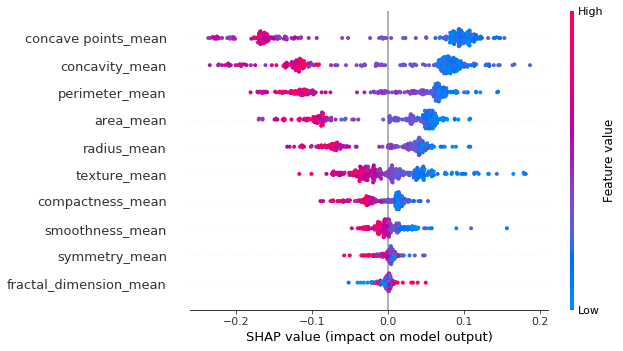

In [32]:
shap.summary_plot(shap_values[1], Xtrain)

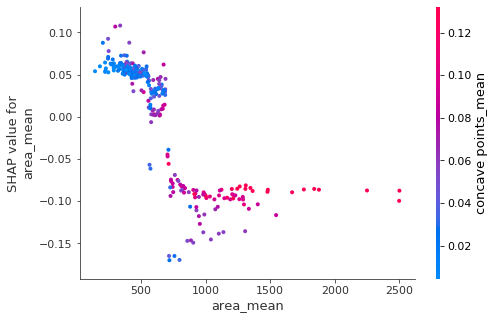

In [36]:
shap.dependence_plot("area_mean", shap_values[1], Xtrain, interaction_index="concave points_mean")